<a href="https://colab.research.google.com/github/igomezv/DataScienceIntermedio/blob/main/Practica2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Práctica de análisis de datos

Vamos a utilizar los datos de: https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/Historico_demanda_y_variables_del_clima_BCA.csv

Los datos provienen de Baja California Norte, de la CENACE.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataurl = "https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/Historico_demanda_y_variables_del_clima_BCA.csv"
df = pd.read_csv(dataurl)
df.head()

fecha  dia_semana_num  pandemia  mes  horario_verano  hora  \
0  01/01/2020               3         1    1               0     1   
1  01/01/2020               3         1    1               0     2   
2  01/01/2020               3         1    1               0     3   
3  01/01/2020               3         1    1               0     4   
4  01/01/2020               3         1    1               0     5   

      demanda temperatura  precipitacion  humedad  velocidadviento  nubosidad  
0  979.901252          45            0.0     62.5              2.8        0.0  
1  956.935050          44            0.0     59.6              2.3        7.9  
2  932.884073          44            0.0     56.4              1.7       16.0  
3  910.799446          44            0.0     57.2              2.4        8.3  
4  892.611492          45            0.0     59.1              3.7        0.2

## Descripción de los atributos.

- fecha: Indica la fecha de la medción, entre 2020 al 2022.
- dia_semana_num: Día de la semana, 1 es lunes y 7 domingo.
- pandemia: 0 no hay pandemia, 1 sí hay pandemia.
- horario_verano: 0 no, 1 sí.
- hora: 1-24
- demanda: MWatts
- temperatura: Farenheit
- precipitacion mm/cm^3
- humedad %
- velocidadviento m/s
- nubosidad %

In [21]:
len(df.values)

26304

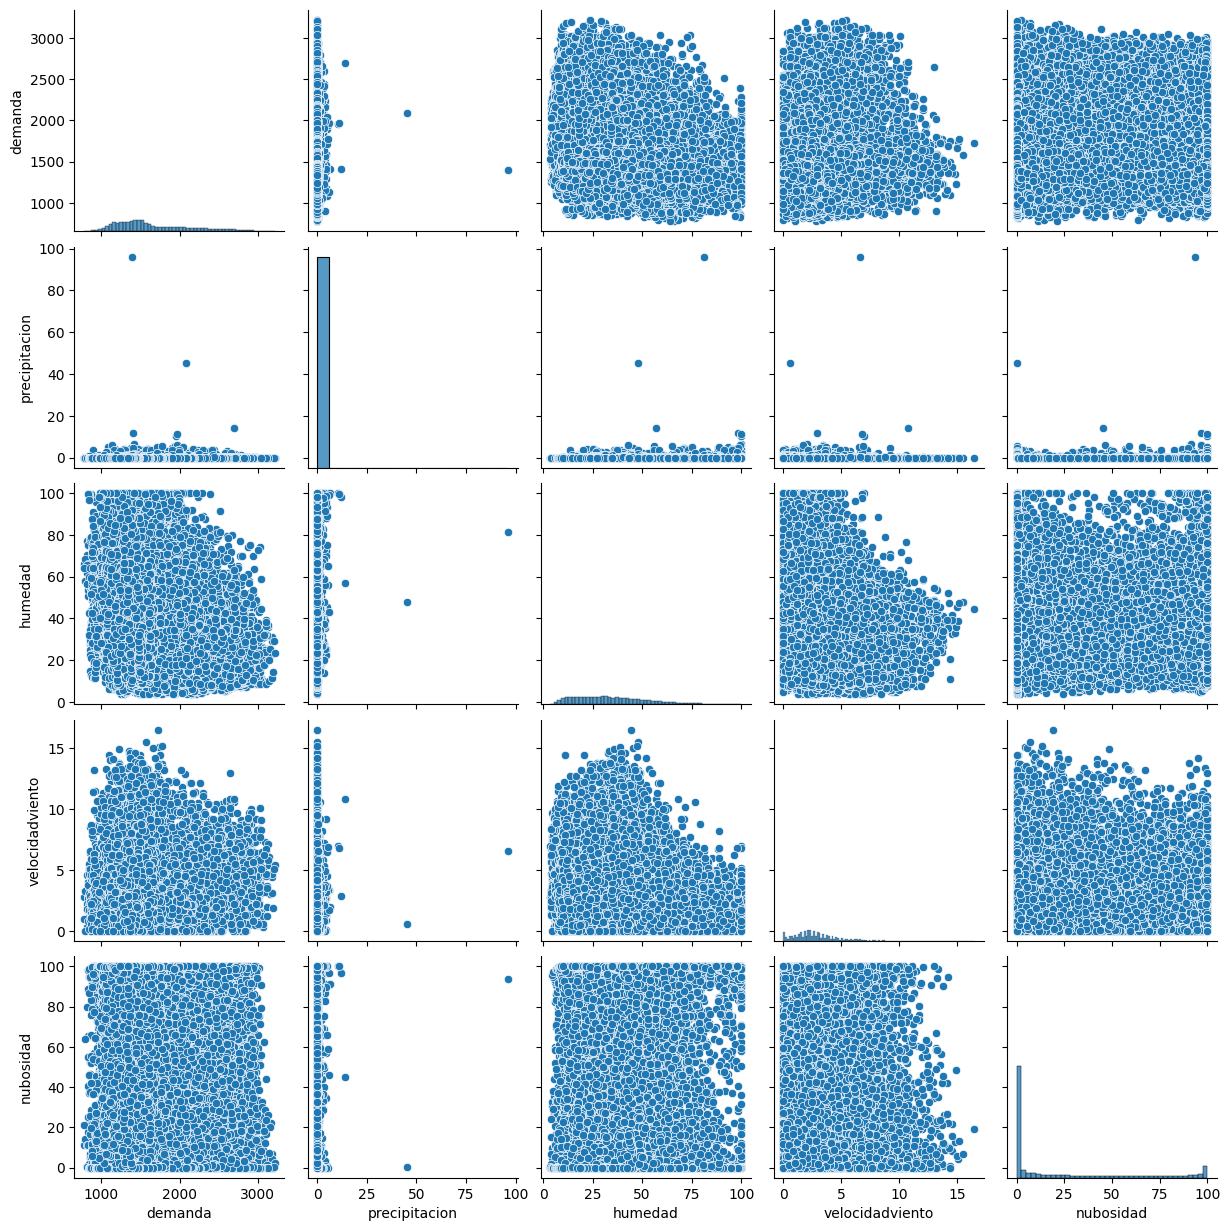

In [22]:
sns.pairplot(df[['demanda', 'temperatura', 'precipitacion', 'humedad', 'velocidadviento', 'nubosidad']])

In [24]:
df[['temperatura']]

temperatura
0              45
1              44
2              44
3              44
4              45
...           ...
26299          60
26300          59
26301          59
26302          58
26303          57

[26304 rows x 1 columns]

In [38]:
df.iloc[:, 7] = pd.to_numeric(df.iloc[:, 7], errors ='coerce')

In [37]:
df.head()

fecha  dia_semana_num  pandemia  mes  horario_verano  hora  \
0  01/01/2020               3         1    1               0     1   
1  01/01/2020               3         1    1               0     2   
2  01/01/2020               3         1    1               0     3   
3  01/01/2020               3         1    1               0     4   
4  01/01/2020               3         1    1               0     5   

      demanda  temperatura  precipitacion  humedad  velocidadviento  nubosidad  
0  979.901252         45.0            0.0     62.5              2.8        0.0  
1  956.935050         44.0            0.0     59.6              2.3        7.9  
2  932.884073         44.0            0.0     56.4              1.7       16.0  
3  910.799446         44.0            0.0     57.2              2.4        8.3  
4  892.611492         45.0            0.0     59.1              3.7        0.2

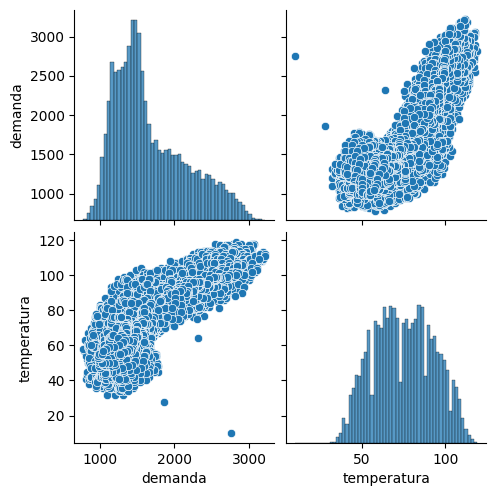

In [40]:
sns.pairplot(df[['demanda', 'temperatura']])

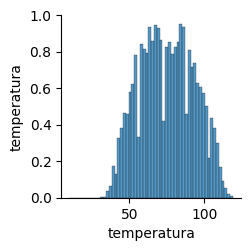

In [52]:
sns.pairplot(df[['fecha', 'temperatura']])

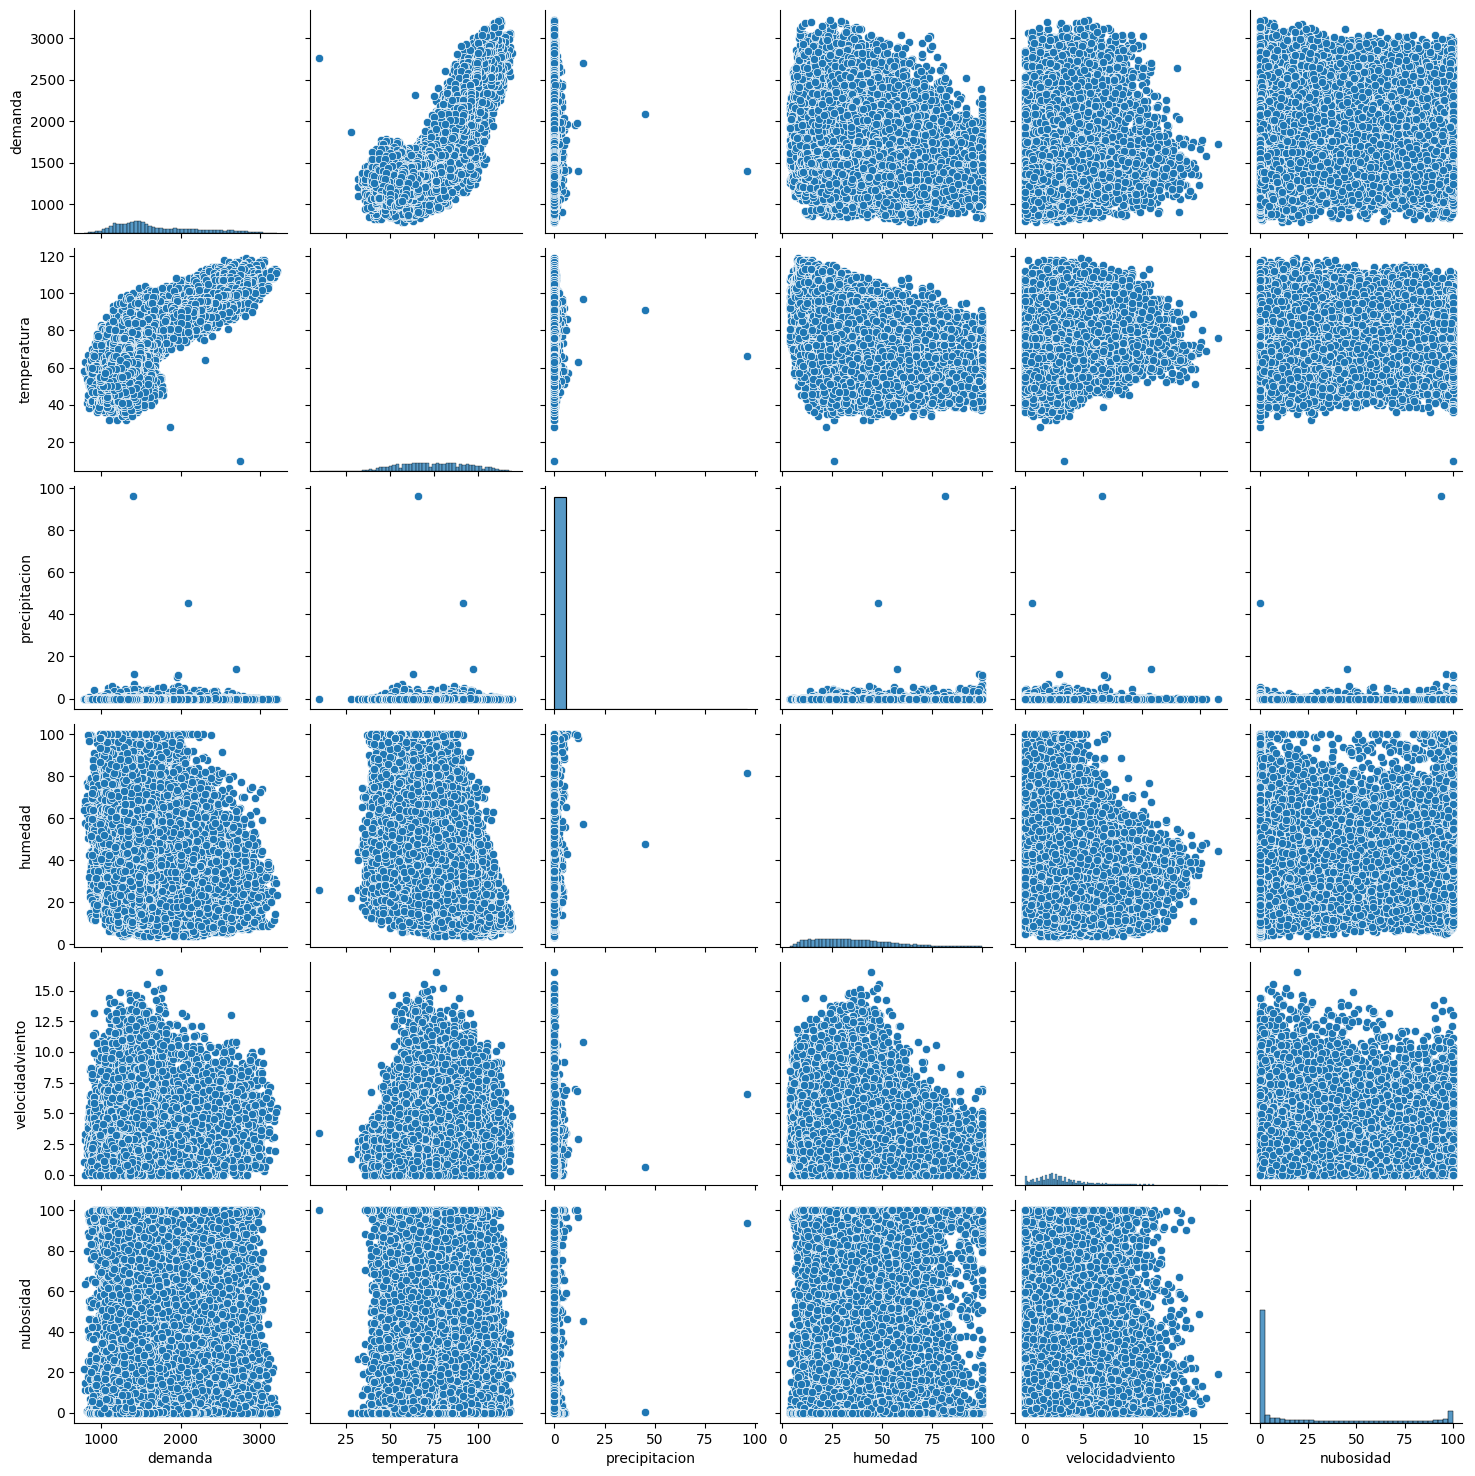

In [41]:
sns.pairplot(df[['demanda', 'temperatura', 'precipitacion', 'humedad', 'velocidadviento', 'nubosidad']])

In [44]:
df_corr = df.corr()

<ipython-input-44-673bd41f6603>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


In [65]:
df_corr['demanda'] >= 0.4

dia_semana_num     False
pandemia           False
mes                False
horario_verano      True
hora               False
demanda             True
temperatura         True
precipitacion      False
humedad            False
velocidadviento    False
nubosidad          False
Name: demanda, dtype: bool

## Selección de variables y datos

Sería conveniente no utilizar los datos de pandemia



In [76]:
df_sinpandemia = df[df['pandemia'] == 0]
df_sinpandemia.head()

df_pandemia = df[df['pandemia'] == 1]
df_pandemia.head()

fecha  dia_semana_num  pandemia  mes  horario_verano  hora  \
0  01/01/2020               3         1    1               0     1   
1  01/01/2020               3         1    1               0     2   
2  01/01/2020               3         1    1               0     3   
3  01/01/2020               3         1    1               0     4   
4  01/01/2020               3         1    1               0     5   

      demanda  temperatura  precipitacion  humedad  velocidadviento  nubosidad  
0  979.901252         45.0            0.0     62.5              2.8        0.0  
1  956.935050         44.0            0.0     59.6              2.3        7.9  
2  932.884073         44.0            0.0     56.4              1.7       16.0  
3  910.799446         44.0            0.0     57.2              2.4        8.3  
4  892.611492         45.0            0.0     59.1              3.7        0.2

In [68]:
len(df_sinpandemia.values)

12432

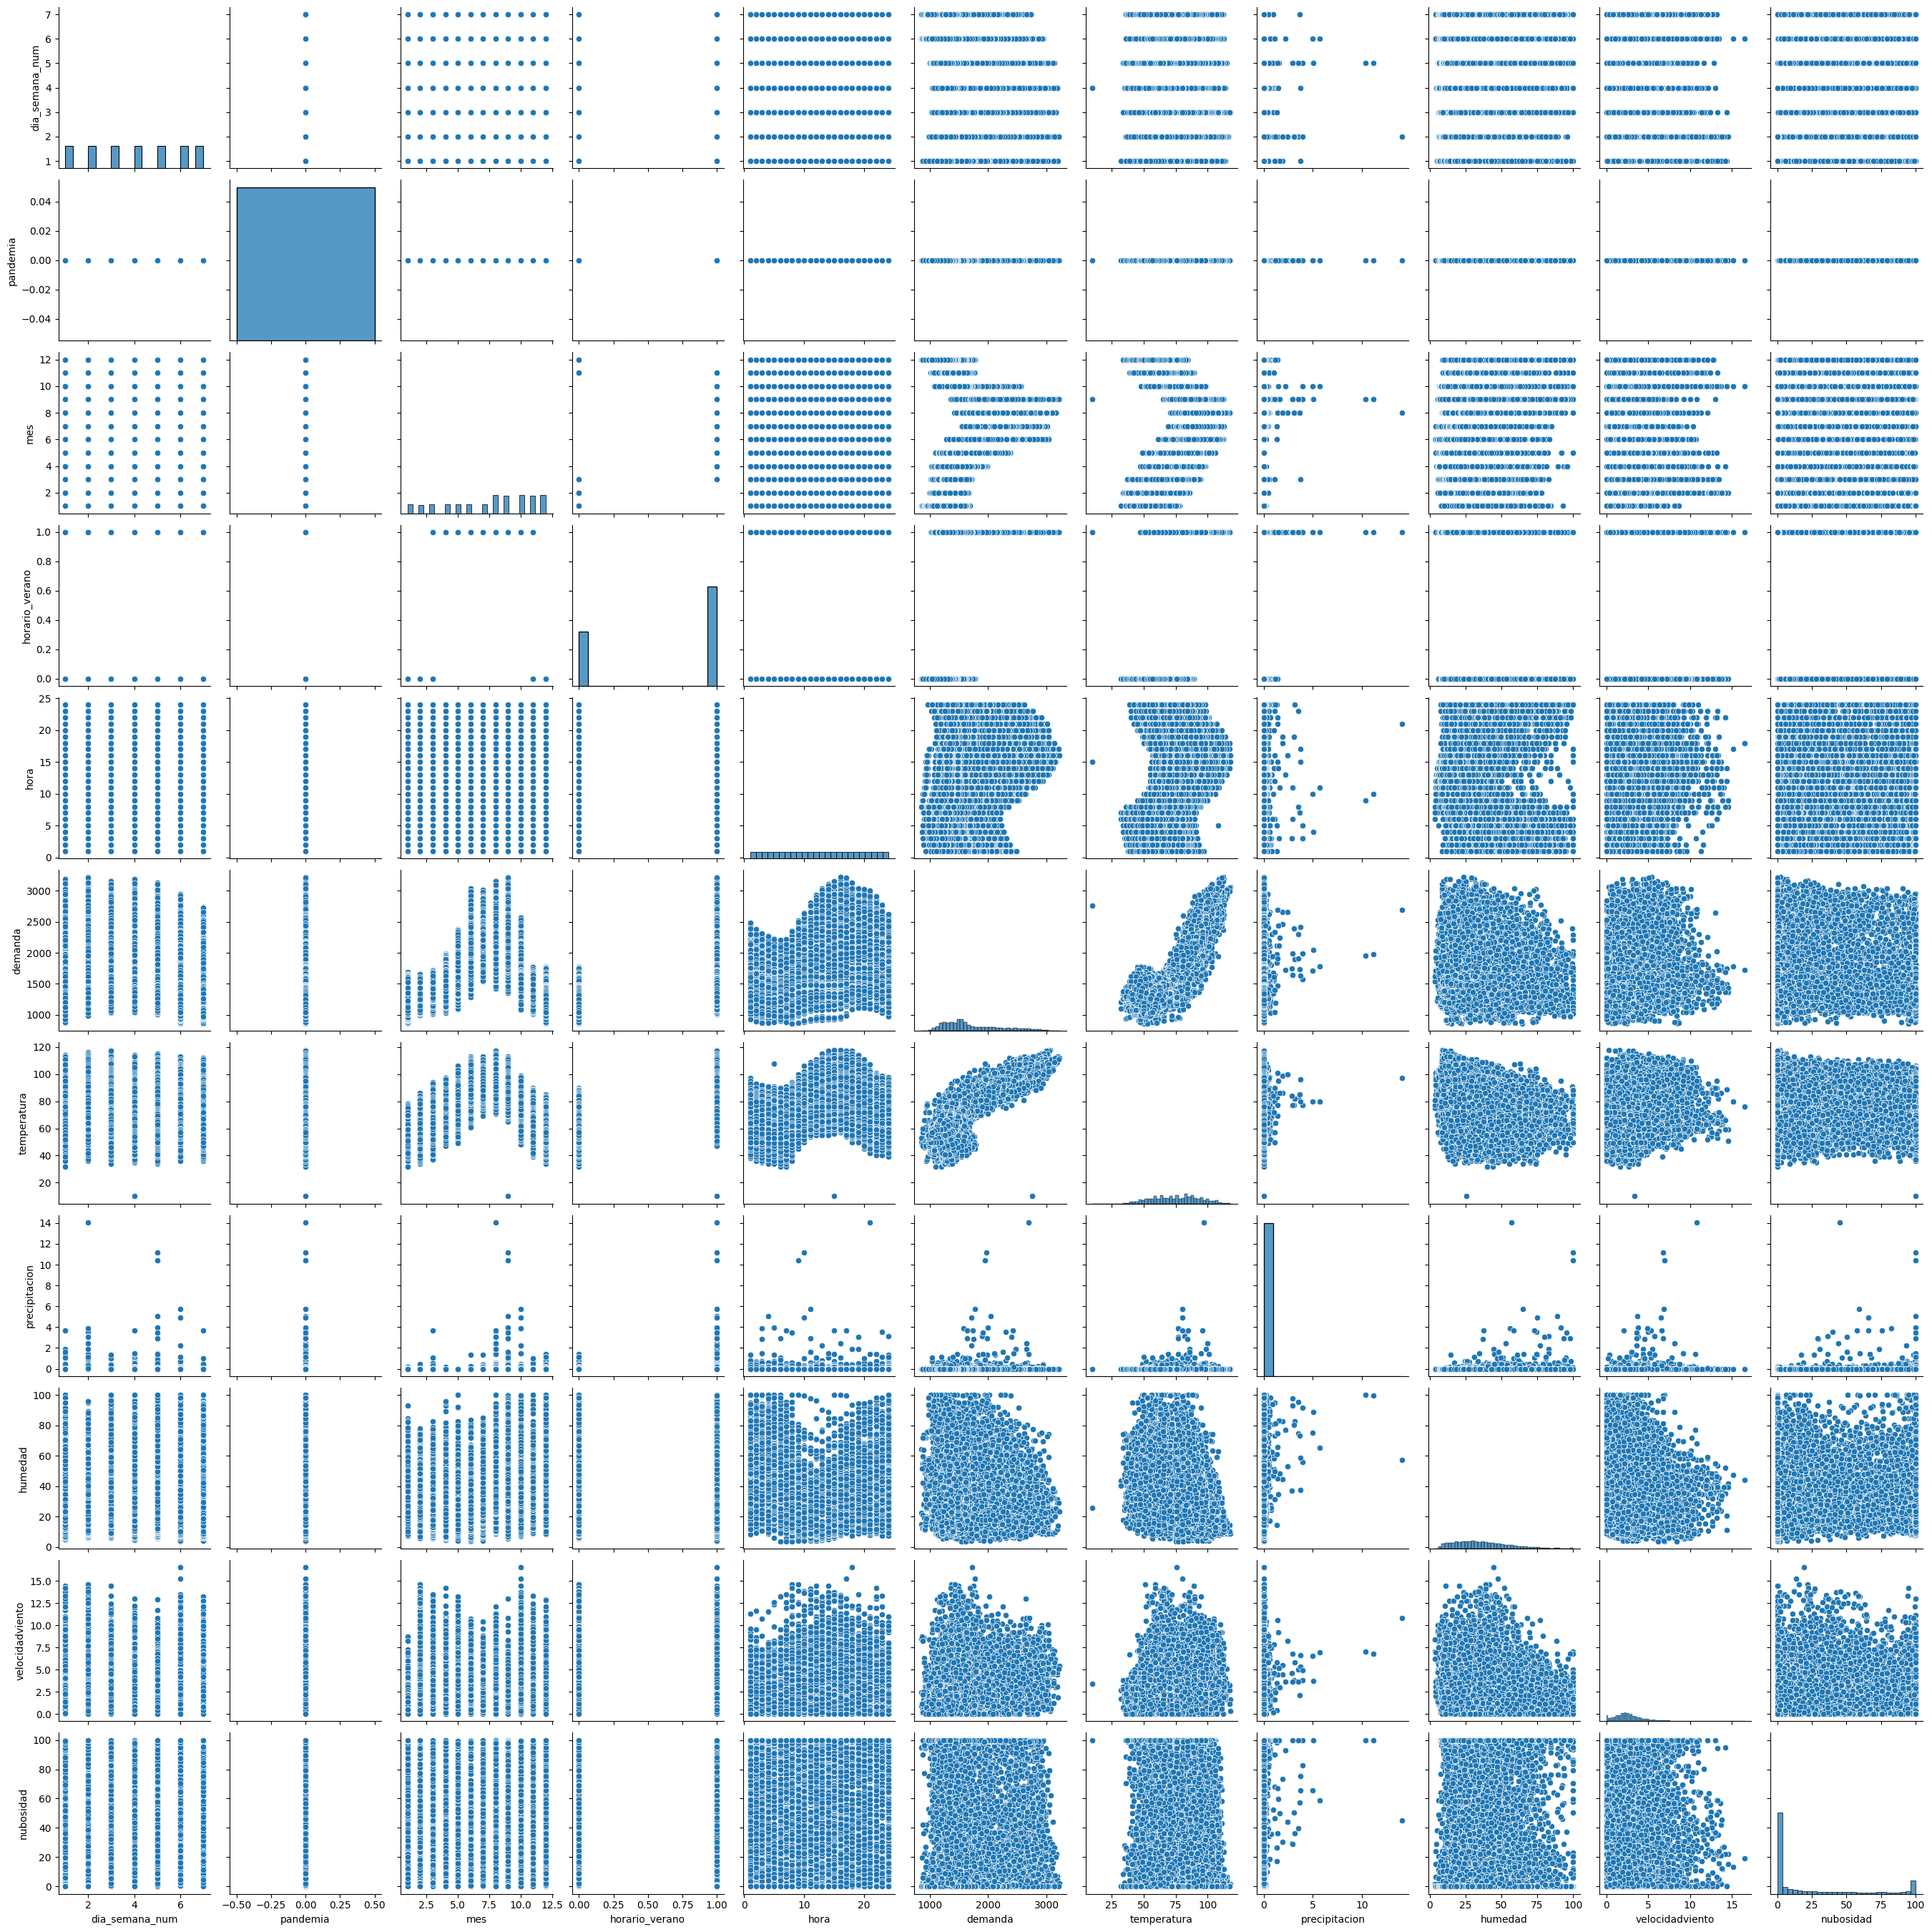

In [64]:
sns.pairplot(df_sinpandemia)

In [89]:
df_sinpandemia_corr = df_sinpandemia.corr()
df_sinpandemia_corr['demanda'] >= 0.4

<ipython-input-89-a7cacbd5f6de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sinpandemia_corr = df_sinpandemia.corr()


dia_semana_num     False
pandemia           False
mes                False
horario_verano      True
hora               False
demanda             True
temperatura         True
precipitacion      False
humedad            False
velocidadviento    False
nubosidad          False
Name: demanda, dtype: bool

### Es necesarion darle formato a la fecha con pandas

In [77]:
# Para indicar que una columna es tipo fecha en un pd.DataFrame, usar pd.to_datatime
df_sinpandemia["fecha"] = pd.to_datetime(df_sinpandemia["fecha"], format='%d/%m/%Y')
df_pandemia["fecha"] = pd.to_datetime(df_pandemia["fecha"], format='%d/%m/%Y')
df_sinpandemia.head()

<ipython-input-77-73d8f4440be3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinpandemia["fecha"] = pd.to_datetime(df_sinpandemia["fecha"], format='%d/%m/%Y')
<ipython-input-77-73d8f4440be3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandemia["fecha"] = pd.to_datetime(df_pandemia["fecha"], format='%d/%m/%Y')


fecha  dia_semana_num  pandemia  mes  horario_verano  hora  \
13872 2021-07-31               7         0    8               1     1   
13873 2021-08-01               7         0    8               1     2   
13874 2021-08-01               7         0    8               1     3   
13875 2021-08-01               7         0    8               1     4   
13876 2021-08-01               7         0    8               1     5   

           demanda  temperatura  precipitacion  humedad  velocidadviento  \
13872  2078.351697         88.0            0.0     38.3              2.5   
13873  1986.910858         87.0            0.0     39.1              3.1   
13874  1902.313822         87.0            0.0     39.7              3.4   
13875  1842.109536         86.0            0.0     40.2              2.5   
13876  1793.675752         85.0            0.0     36.2              1.0   

       nubosidad  
13872        0.0  
13873        0.0  
13874        0.0  
13875        0.0  
13876        0.0

In [78]:
df_sinpandemia.index = pd.to_datetime(df_sinpandemia["fecha"], format='%d/%m/%Y')
df_pandemia.index = pd.to_datetime(df_pandemia['fecha'], format='%d/%m/%Y')
df_sinpandemia.head()

fecha  dia_semana_num  pandemia  mes  horario_verano  hora  \
fecha                                                                        
2021-07-31 2021-07-31               7         0    8               1     1   
2021-08-01 2021-08-01               7         0    8               1     2   
2021-08-01 2021-08-01               7         0    8               1     3   
2021-08-01 2021-08-01               7         0    8               1     4   
2021-08-01 2021-08-01               7         0    8               1     5   

                demanda  temperatura  precipitacion  humedad  velocidadviento  \
fecha                                                                           
2021-07-31  2078.351697         88.0            0.0     38.3              2.5   
2021-08-01  1986.910858         87.0            0.0     39.1              3.1   
2021-08-01  1902.313822         87.0            0.0     39.7              3.4   
2021-08-01  1842.109536         86.0            0.0     40.2              2.5   
2021-08-01  1793.675752         85.0            0.0     36.2              1.0   

            nubosidad  
fecha                  
2021-07-31        0.0  
2021-08-01        0.0  
2021-08-01        0.0  
2021-08-01        0.0  
2021-08-01        0.0

In [90]:
type(df_sinpandemia['fecha'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [92]:
df_sinpandemia['fecha'][0]

Timestamp('2021-07-31 00:00:00')

In [94]:
df_sinpandemia['fecha'][0].year

2021

<Axes: xlabel='fecha'>

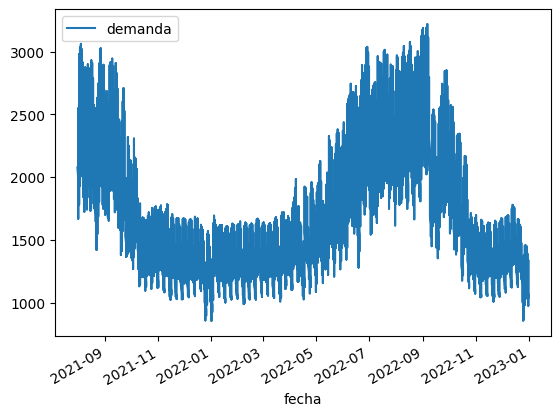

In [79]:
df_sinpandemia[['demanda']].plot()

<Axes: xlabel='fecha'>

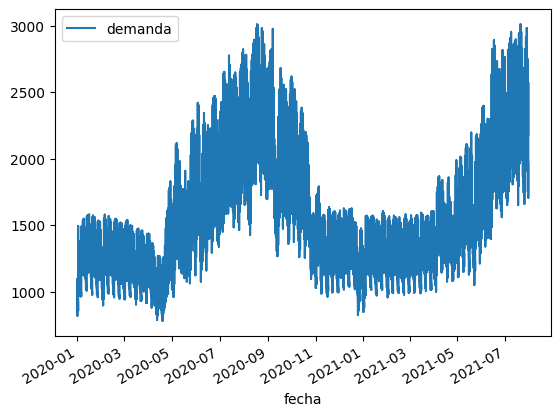

In [80]:
df_pandemia[['demanda']].plot()

In [86]:
np.min(df_pandemia[['demanda']]), np.mean(df_pandemia[['demanda']])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(demanda    779.578252
 dtype: float64,
 demanda    1608.469751
 dtype: float64)

In [88]:
np.min(df_sinpandemia[['demanda']]), np.mean(df_sinpandemia[['demanda']])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(demanda    857.403342
 dtype: float64,
 demanda    1746.318528
 dtype: float64)

## Parece que podemos confiar en los datos

### ¿Qué problema queremos resolver? ¿nos conviene usar regresión, clasificación o clustering?

Virginia: Regresión, hay variables numéricas. Considerando que la temperatura tiene correlación con la demanda.

Variable a predecir: Demanda

Variables de entrada: Todas, excepto pandemia

Agregar una columna con el año.

In [99]:
df_sinpandemia['anio'] = df_sinpandemia["fecha"].dt.year

<ipython-input-99-9ddcc155011d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinpandemia['anio'] = df_sinpandemia["fecha"].dt.year


In [97]:
df_sinpandemia.head()

fecha  dia_semana_num  pandemia  mes  horario_verano  hora  \
fecha                                                                        
2021-07-31 2021-07-31               7         0    8               1     1   
2021-08-01 2021-08-01               7         0    8               1     2   
2021-08-01 2021-08-01               7         0    8               1     3   
2021-08-01 2021-08-01               7         0    8               1     4   
2021-08-01 2021-08-01               7         0    8               1     5   

                demanda  temperatura  precipitacion  humedad  velocidadviento  \
fecha                                                                           
2021-07-31  2078.351697         88.0            0.0     38.3              2.5   
2021-08-01  1986.910858         87.0            0.0     39.1              3.1   
2021-08-01  1902.313822         87.0            0.0     39.7              3.4   
2021-08-01  1842.109536         86.0            0.0     40.2              2.5   
2021-08-01  1793.675752         85.0            0.0     36.2              1.0   

            nubosidad  anio  
fecha                        
2021-07-31        0.0  2021  
2021-08-01        0.0  2021  
2021-08-01        0.0  2021  
2021-08-01        0.0  2021  
2021-08-01        0.0  2021

In [100]:
df_sinpandemia = df_sinpandemia[['dia_semana_num', 'mes', 'horario_verano', 'hora', 'demanda', 	'temperatura', 'precipitacion', 	'humedad', 	'velocidadviento', 	'nubosidad', 	'anio']]
df_sinpandemia.head()

dia_semana_num  mes  horario_verano  hora      demanda  \
fecha                                                                
2021-07-31               7    8               1     1  2078.351697   
2021-08-01               7    8               1     2  1986.910858   
2021-08-01               7    8               1     3  1902.313822   
2021-08-01               7    8               1     4  1842.109536   
2021-08-01               7    8               1     5  1793.675752   

            temperatura  precipitacion  humedad  velocidadviento  nubosidad  \
fecha                                                                         
2021-07-31         88.0            0.0     38.3              2.5        0.0   
2021-08-01         87.0            0.0     39.1              3.1        0.0   
2021-08-01         87.0            0.0     39.7              3.4        0.0   
2021-08-01         86.0            0.0     40.2              2.5        0.0   
2021-08-01         85.0            0.0     36.2              1.0        0.0   

            anio  
fecha             
2021-07-31  2021  
2021-08-01  2021  
2021-08-01  2021  
2021-08-01  2021  
2021-08-01  2021

In [101]:
df_sinpandemia.values

array([[7.000e+00, 8.000e+00, 1.000e+00, ..., 2.500e+00, 0.000e+00,
        2.021e+03],
       [7.000e+00, 8.000e+00, 1.000e+00, ..., 3.100e+00, 0.000e+00,
        2.021e+03],
       [7.000e+00, 8.000e+00, 1.000e+00, ..., 3.400e+00, 0.000e+00,
        2.021e+03],
       ...,
       [6.000e+00, 1.200e+01, 0.000e+00, ...,       nan,       nan,
        2.022e+03],
       [6.000e+00, 1.200e+01, 0.000e+00, ...,       nan,       nan,
        2.022e+03],
       [6.000e+00, 1.200e+01, 0.000e+00, ...,       nan,       nan,
        2.022e+03]])